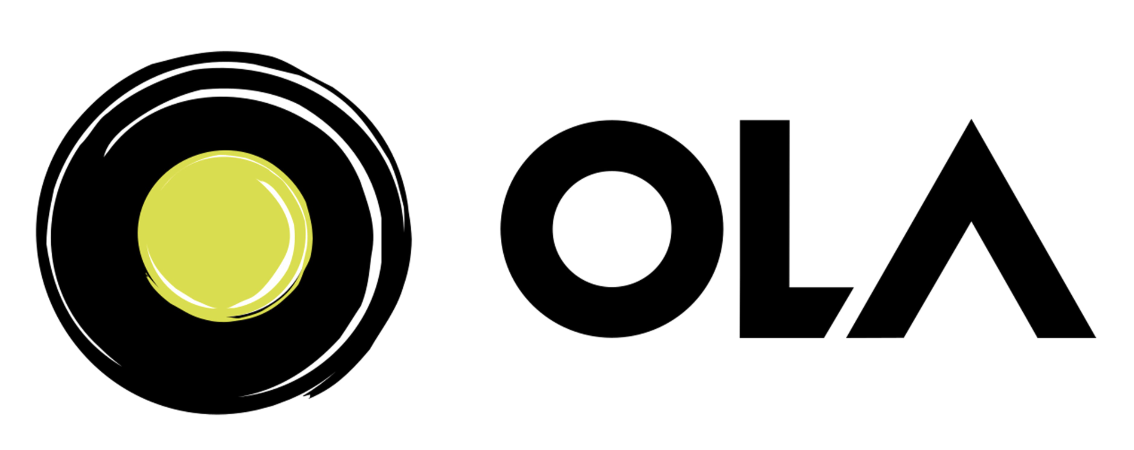

#About the case study:

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it's very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don't have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating, * Monthly business acquired, grade, Income)

##<font size='5'>Feature Profiling:

---

*   MMMM-YY : Reporting Date (Monthly) (date-time)

*   Age : Age of the employee (numerical)

*   Gender : Gender of the employee – Male : 0, Female: 1 (categorical)

*   City : City Code of the employee (categorical)

*   Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate (categorical)

*   Income : Monthly average Income of the employee (numerical)

*   Date Of Joining : Joining date for the employee (date-time)

*   LastWorkingDate : Last date of working for the employee - Target Feature (date-time, but will be converted to categorical)

*   Joining Designation : Designation of the employee at the time of joining (categorical, ordinal)


*   Grade : Grade of the employee at the time of reporting (categorical, ordinal)

*   Total Business Value : The total business value acquired by the employee in a month (negative business indicates cancellation/refund or car EMI adjustments) (numerical)

*   Quarterly Rating : Quarterly rating of the employee: 1,2,3,4,5 (categorical, ordinal - higher is better)

---

#Load Dataset

In [ ]:
!gdown 1EK0mtTY35PmJ5O83dF9Ai4x3_PU2iyMM

Downloading...
From: https://drive.google.com/uc?id=1EK0mtTY35PmJ5O83dF9Ai4x3_PU2iyMM
To: /content/ola_driver_churn.csv
100% 1.13M/1.13M [00:00<00:00, 117MB/s]


In [ ]:
import pandas as pd, numpy as np

In [ ]:
df = pd.read_csv('ola_driver_churn.csv')
df.head(3)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
num_cols = df.select_dtypes(include=[int, float]).columns.tolist()
cat_cols = df.select_dtypes(include=object).columns.tolist()

print(f'lenght of num_cols: {len(num_cols)}')
print(f'length of cat_cols: {len(cat_cols)}')

lenght of num_cols: 10
length of cat_cols: 4


In [ ]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


#Handling Missing Values

In [ ]:
(df.isna().sum()/len(df))*100

Unnamed: 0               0.000000
MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

<font size='4'> "Age" and "Gender" have 0.32% and 0.27% of missing values. We'll use KNN imputation technique to handle this.

#Preprocessing

In [ ]:
print(f"Categorical Features before Removing 'LastWorkingDate': {cat_cols}")
cat_cols.remove('LastWorkingDate')
print()
print(f"Categorical Features after Removing 'LastWorkingDate': {cat_cols}")

Categorical Features before Removing 'LastWorkingDate': ['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']

Categorical Features after Removing 'LastWorkingDate': ['MMM-YY', 'City', 'Dateofjoining']


In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

In [ ]:
df.head(3)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
num_cols.remove('Unnamed: 0')

###Date Engineering

In [ ]:
def date_change(date):
  temp, new_date = [], ''
  temp = date.split('/')
  new_date = temp[1] + temp[0] + temp[2]
  return pd.to_datetime(new_date)

In [ ]:
date_change(date)

Timestamp('2020-01-12 00:00:00')

In [ ]:
df['MMM-YY'] = df['MMM-YY'].apply(date_change)
df['Dateofjoining'] = df['Dateofjoining'].apply(date_change)
df.head(3)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2
1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2
2,2019-01-03,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2


In [ ]:
df['Service_Duration_in_days'] = df['MMM-YY']-df['Dateofjoining']
df.head(3)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Service_Duration_in_days
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,8 days
1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,9 days
2,2019-01-03,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2,10 days


In [ ]:
df['Service_Duration_in_days'] = df['Service_Duration_in_days'].apply(lambda x:int(str(x).split()[0]))
df.head(3)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Service_Duration_in_days
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,8
1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,9
2,2019-01-03,1,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,0,2,10


###Analysing Negative Values in "Service_Duration_in_days"

In [ ]:
df.loc[df['Service_Duration_in_days']<0]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Service_Duration_in_days
3,2020-01-11,2,31.0,0.0,C7,2,67016,2020-06-11,NaN,2,2,0,1,-152
4,2020-01-12,2,31.0,0.0,C7,2,67016,2020-06-11,NaN,2,2,0,1,-151
5,2019-01-12,4,43.0,0.0,C13,2,65603,2019-07-12,NaN,2,2,0,1,-181
10,2019-01-01,5,29.0,0.0,C9,0,46368,2019-09-01,NaN,1,1,0,1,-243
11,2019-01-02,5,29.0,0.0,C9,0,46368,2019-09-01,NaN,1,1,120360,1,-242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-01-08,2788,30.0,0.0,C27,2,70254,2020-08-06,NaN,2,2,740280,3,-211
19100,2020-01-09,2788,30.0,0.0,C27,2,70254,2020-08-06,NaN,2,2,448370,3,-210
19101,2020-01-10,2788,30.0,0.0,C27,2,70254,2020-08-06,NaN,2,2,0,2,-209
19102,2020-01-11,2788,30.0,0.0,C27,2,70254,2020-08-06,NaN,2,2,200420,2,-208


<font size='4'> There are over 5500 data points that have a negative value. This indicates that they might have churned out and have joined again.

###Analysing Negative Values in "Total Business Value"

In [ ]:
df.loc[df['Total Business Value']<0]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Service_Duration_in_days
1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,9
129,2020-01-04,25,30.0,0.0,C24,1,102077,2017-10-30,NaN,1,3,-414250,3,796
187,2019-01-11,36,40.0,1.0,C18,1,32865,2019-01-07,NaN,2,2,-19350,2,4
191,2020-01-03,36,40.0,1.0,C18,1,32865,2019-01-07,NaN,2,2,-50000,1,361
196,2020-01-08,36,41.0,1.0,C18,1,32865,2019-01-07,29/07/20,2,2,-325140,2,366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18578,2020-01-04,2716,32.0,1.0,C29,1,38744,2019-06-16,NaN,1,1,-101490,1,202
18687,2020-01-08,2728,27.0,1.0,C19,2,28318,2020-11-03,NaN,1,1,-1704230,1,-300
18705,2020-01-09,2729,34.0,0.0,C10,0,107274,2019-04-08,NaN,4,4,-223820,2,276
18847,2019-01-05,2751,31.0,0.0,C17,2,53115,2015-05-11,NaN,1,1,-21790,2,1335


<font size = '4'>There are in total 149 data points where "Total Business Value" is negative.

<font size = '4'>A negative value in "Total Business Value" indicates cancellation/refundor Car EMI adjustments.

#Univariate Analysis

In [ ]:
df.head(2)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Service_Duration_in_days
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,2381060,2,8
1,2019-01-02,1,28.0,0.0,C23,2,57387,2018-12-24,NaN,1,1,-665480,2,9


##Analysing unique values in each feature

In [ ]:
for i in cat_cols:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in MMM-YY is 24
Number of unique values in City is 29
Number of unique values in Dateofjoining is 869


In [ ]:
for i in num_cols:
  print(f'Number of unique values in {i} is {df[i].nunique()}')

Number of unique values in Driver_ID is 2381
Number of unique values in Age is 36
Number of unique values in Gender is 2
Number of unique values in Education_Level is 3
Number of unique values in Income is 2383
Number of unique values in Joining Designation is 5
Number of unique values in Grade is 5
Number of unique values in Total Business Value is 10181
Number of unique values in Quarterly Rating is 4


##Visualisation

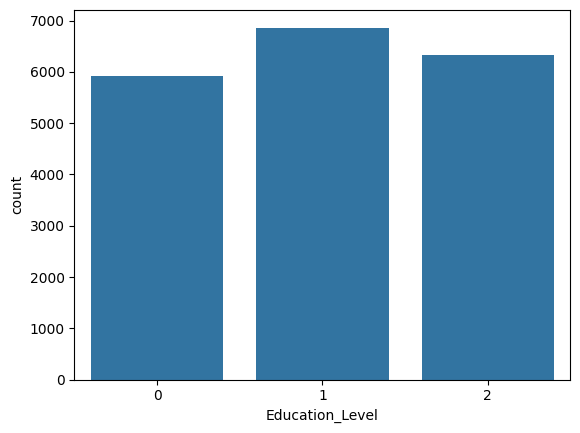

In [ ]:
sns.countplot(x='Education_Level', data=df)
plt.show()

<font size='4'> "Education_Level" is balanced

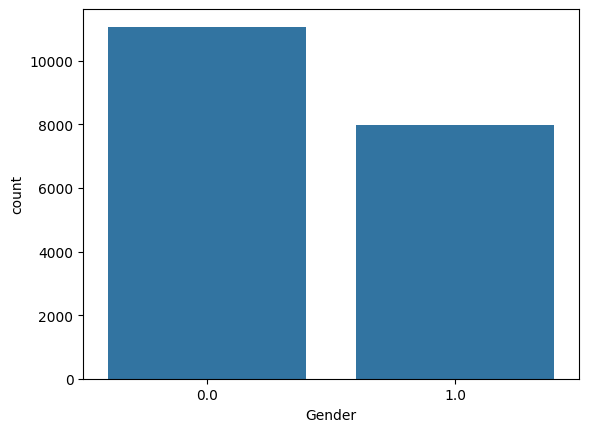

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

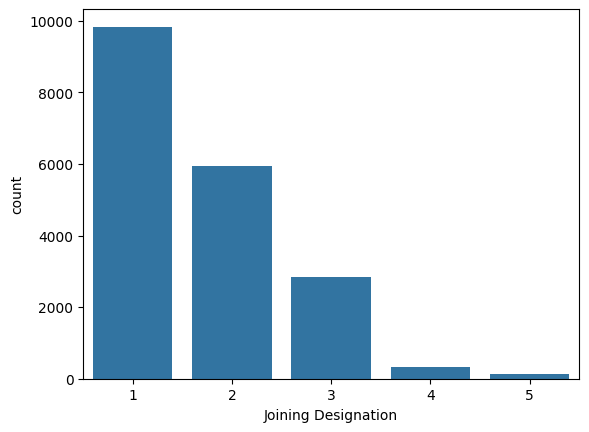

In [ ]:
sns.countplot(x='Joining Designation',data=df)
plt.show()

NOTE: Joining Designation 1 is the most common

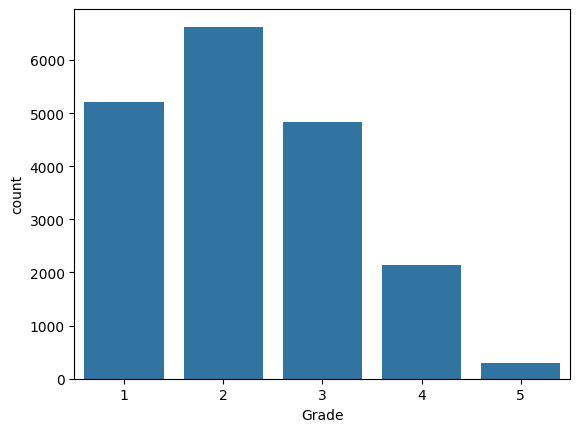

In [ ]:
sns.countplot(x='Grade',data=df)
plt.show()

NOTE: Grade 2 is the most common

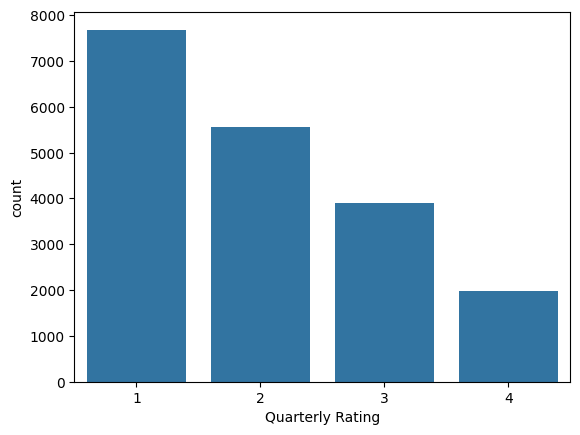

In [ ]:
sns.countplot(x='Quarterly Rating',data=df)
plt.show()

NOTE: The most common Quarterly Rating is 1

#Feature Engineering

In [ ]:
df_copy = df.copy(deep=True)

In [ ]:
Target = df_copy.groupby('Driver_ID').aggregate({'LastWorkingDate':'last'})['LastWorkingDate'].isna()
Target

Driver_ID
1       False
2        True
4       False
5       False
6        True
        ...  
2784     True
2785    False
2786    False
2787    False
2788     True
Name: LastWorkingDate, Length: 2381, dtype: bool

In [ ]:
Target=Target.replace({True:1, False:0})
df_target = pd.DataFrame(Target).reset_index()
df_target.head(3)

,Driver_ID,LastWorkingDate
0,1,0
1,2,1
2,4,0


In [ ]:
df_target.rename(columns={'LastWorkingDate':'Target'}, inplace=True)
df_target.head(3)

,Driver_ID,Target
0,1,0
1,2,1
2,4,0


In [ ]:
QR1 =  (df_copy.groupby('Driver_ID').aggregate({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
print(QR1.head(3))
QR2 = (df_copy.groupby('Driver_ID').aggregate({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()
print(QR2.head(3))

   Driver_ID  Quarterly Rating
0          1                 2
1          2                 1
2          4                 1
   Driver_ID  Quarterly Rating
0          1                 2
1          2                 1
2          4                 1


In [ ]:
df_target = df_target.merge(QR1, on='Driver_ID')
df_target = df_target.merge(QR2, on='Driver_ID')

df_target.head(3)

,Driver_ID,Target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1


In [ ]:
df_target['Higher_Rating'] = np.where(df_target['Quarterly Rating_y']>df_target['Quarterly Rating_x'], 1,0)
df_target.drop(columns=['Quarterly Rating_x', 'Quarterly Rating_y'], inplace=True)
df_target.head(3)

,Driver_ID,Target,Higher_Rating
0,1,0,0
1,2,1,0
2,4,0,0


In [ ]:
income1 =  (df_copy.groupby('Driver_ID').aggregate({'Income':'first'})['Income']).reset_index()
print(income1.head(3))
income2 = (df_copy.groupby('Driver_ID').aggregate({'Income':'last'})['Income']).reset_index()
print(income2.head(3))

   Driver_ID  Income
0          1   57387
1          2   67016
2          4   65603
   Driver_ID  Income
0          1   57387
1          2   67016
2          4   65603


In [ ]:
df_target = df_target.merge(income1, on='Driver_ID')
df_target = df_target.merge(income2, on='Driver_ID')

df_target.head(3)

,Driver_ID,Target,Higher_Rating,Income_x,Income_y
0,1,0,0,57387,57387
1,2,1,0,67016,67016
2,4,0,0,65603,65603


In [ ]:
df_target['Higher_Income'] = np.where(df_target['Income_y']>df_target['Income_x'], 1,0)
df_target.drop(columns=['Income_x', 'Income_y'],inplace=True)
df_target.head(3)

,Driver_ID,Target,Higher_Rating,Higher_Income
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0


In [ ]:
df_copy.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating',
       'Service_Duration_in_days'],
      dtype='object')

In [ ]:
agg_dict = {'MMM-YY':'count', 'Driver_ID':'last', 'Age':'max', 'Gender':'last', 'City':'last', 'Education_Level':'last', 'Income':'sum', 'Dateofjoining':'first',
            'LastWorkingDate':'last', 'Joining Designation':'last', 'Grade':'last', 'Total Business Value':'sum', 'Quarterly Rating':'first'}

df_copy=df_copy.groupby('Driver_ID').aggregate(agg_dict)
df_copy['Month'] = df_copy['Dateofjoining'].dt.month
df_copy['Year'] = df_copy['Dateofjoining'].dt.year
df_copy.rename(columns={'MMM-YY':'Reportings'}, inplace=True)
df_copy.head(3)

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month,Year
Driver_ID,,,,,,,,,,,,,,,
1,3,1,28.0,0.0,C23,2,172161,2018-12-24,03/11/19,1,1,1715580,2,12,2018
2,2,2,31.0,0.0,C7,2,134032,2020-06-11,None,2,2,0,1,6,2020
4,5,4,43.0,0.0,C13,2,328015,2019-07-12,27/04/20,2,2,350000,1,7,2019


In [ ]:
df_copy.reset_index(drop=True, inplace=True)
df_copy = df_copy.merge(df_target,on='Driver_ID')
df_copy.head(3)

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month,Year,Target,Higher_Rating,Higher_Income
0,3,1,28.0,0.0,C23,2,172161,2018-12-24,03/11/19,1,1,1715580,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,134032,2020-06-11,None,2,2,0,1,6,2020,1,0,0
2,5,4,43.0,0.0,C13,2,328015,2019-07-12,27/04/20,2,2,350000,1,7,2019,0,0,0


In [ ]:
import regex
df_copy['Age'] = df_copy['Age'].astype('int64')
df_copy['Cities'] =df_copy['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df_copy.head(3)

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month,Year,Target,Higher_Rating,Higher_Income,Cities
0,3,1,28,0.0,C23,2,172161,2018-12-24,03/11/19,1,1,1715580,2,12,2018,0,0,0,23
1,2,2,31,0.0,C7,2,134032,2020-06-11,None,2,2,0,1,6,2020,1,0,0,7
2,5,4,43,0.0,C13,2,328015,2019-07-12,27/04/20,2,2,350000,1,7,2019,0,0,0,13


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reportings            2381 non-null   int64         
 1   Driver_ID             2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  Month             

In [ ]:
df_copy.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
df_copy['Gender'].replace({'M':0,'F':1},inplace=True)
df_copy['Gender'] = df_copy['Gender'].astype('int64')
df_copy.head(3)

,Reportings,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month,Year,Target,Higher_Rating,Higher_Income,Cities
0,3,1,28,0,2,172161,1,1,1715580,2,12,2018,0,0,0,23
1,2,2,31,0,2,134032,2,2,0,1,6,2020,1,0,0,7
2,5,4,43,0,2,328015,2,2,350000,1,7,2019,0,0,0,13


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


#Visualisation

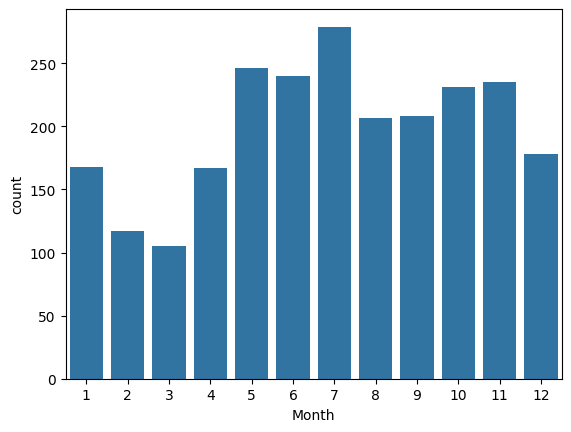

In [ ]:
sns.countplot(x='Month',data=df_copy)
plt.show()

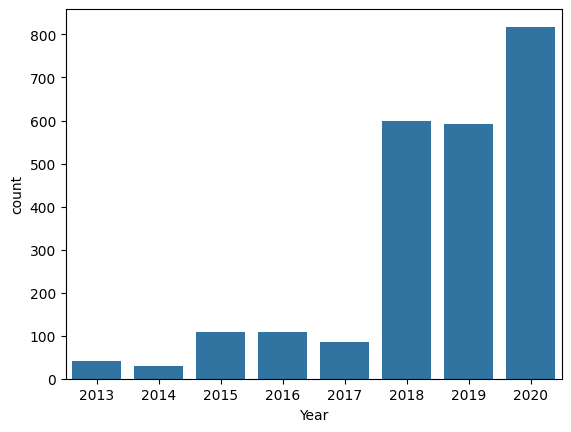

In [ ]:
sns.countplot(x='Year', data=df_copy)
plt.show()

<font size='5'> Observations:
* <font size='4'>July received the maximum number of drivers in 8 years.
* <font size='4'>February and March receives the least number of Drivers joining OLA.
* <font size='4'>Joining of Drivers receives a boost of about 500% after 2017.

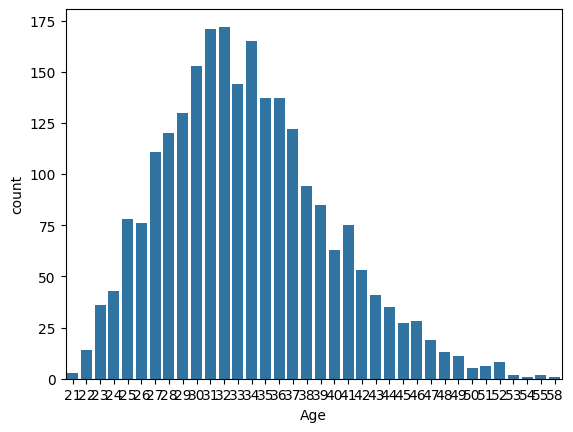

In [ ]:
sns.countplot(x='Age', data=df_copy)
plt.show()

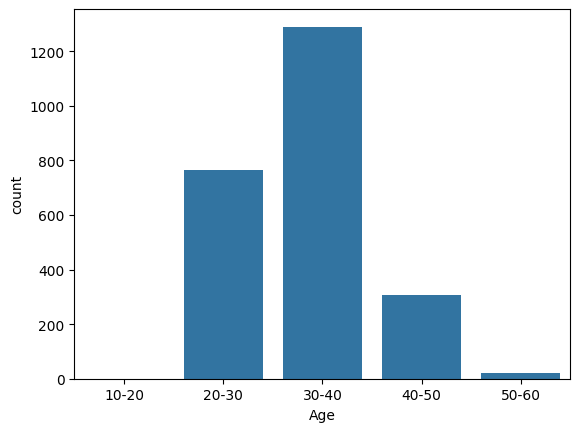

In [ ]:
df_age_plot = pd.cut(df_copy['Age'],bins=[10,20,30,40,50,60],labels=['10-20','20-30','30-40','40-50','50-60'])
sns.countplot(x='Age',data=pd.DataFrame(df_age_plot))
plt.show()

In [ ]:
num_cols=df_copy.select_dtypes(include=[int,float])
num_cols

,Driver_ID,Age,Gender,Education_Level,Reportings,Joining Designation,Total Business Value,Grade,Quarterly Rating,Income,Higher_Rating,Month,Year,Cities,Target
0,1,28,0,2,3,1,1715580,1,2,172161,0,12,2018,23,0
1,2,31,0,2,2,2,0,2,1,134032,0,6,2020,7,1
2,4,43,0,2,5,2,350000,2,1,328015,0,7,2019,13,0
3,5,29,0,0,3,1,120360,1,1,139104,0,9,2019,9,0
4,6,31,1,1,5,3,1265000,3,1,393640,1,7,2020,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,0,0,24,2,21748820,3,3,1987560,1,10,2015,24,1
2377,2785,34,1,0,3,1,0,1,1,36315,0,8,2020,9,0
2378,2786,45,0,0,9,2,2815090,2,2,318330,0,7,2018,19,0
2379,2787,28,1,2,6,1,977830,1,2,416988,0,7,2018,20,0


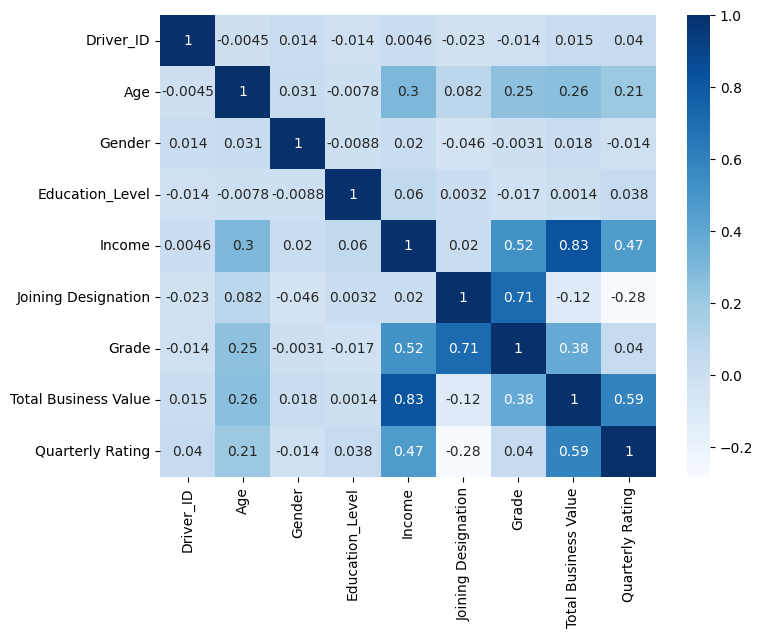

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_copy[num_cols].corr(), annot=True, cmap='Blues')
plt.show()

NOTE:
* Age is positively correlated with income.
* Income is positively correlated with Total Business Value, Grade and Quarterly Rating.

#Preparation of Ensemble Model Building

<font size='4'> We'll prioritize recall to reduce our false negatives. In the context of driver churn, this is useful. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression as LRC
from sklearn.ensemble import RandomForestClassifier as RFC, BaggingClassifier as BC, GradientBoostingClassifier as GBC

from xgboost import XGBClassifier as XGBC
from sklearn.tree import DecisionTreeClassifier as DTC

In [ ]:
df_copy.head(3)

,Reportings,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Month,Year,Target,Higher_Rating,Higher_Income,Cities
0,3,1,28,0,2,172161,1,1,1715580,2,12,2018,0,0,0,23
1,2,2,31,0,2,134032,2,2,0,1,6,2020,1,0,0,7
2,5,4,43,0,2,328015,2,2,350000,1,7,2019,0,0,0,13


In [ ]:
df_copy.columns

Index(['Reportings', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Month', 'Year', 'Target', 'Higher_Rating',
       'Higher_Income', 'Cities'],
      dtype='object')

In [ ]:
df_copy=df_copy[['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Reportings',
                 'Joining Designation', 'Total Business Value', 'Grade', 'Quarterly Rating',
                 'Income', 'Higher_Rating', 'Month', 'Year', 'Cities', 'Target']]
df_copy.head(3)

,Driver_ID,Age,Gender,Education_Level,Reportings,Joining Designation,Total Business Value,Grade,Quarterly Rating,Income,Higher_Rating,Month,Year,Cities,Target
0,1,28,0,2,3,1,1715580,1,2,172161,0,12,2018,23,0
1,2,31,0,2,2,2,0,2,1,134032,0,6,2020,7,1
2,4,43,0,2,5,2,350000,2,1,328015,0,7,2019,13,0


In [ ]:
X = df_copy.drop(columns='Target')
X.head(3)

,Driver_ID,Age,Gender,Education_Level,Reportings,Joining Designation,Total Business Value,Grade,Quarterly Rating,Income,Higher_Rating,Month,Year,Cities
0,1,28,0,2,3,1,1715580,1,2,172161,0,12,2018,23
1,2,31,0,2,2,2,0,2,1,134032,0,6,2020,7
2,4,43,0,2,5,2,350000,2,1,328015,0,7,2019,13


In [ ]:
y=df_copy['Target']
y.head(3)

0    0
1    1
2    0
Name: Target, dtype: int64

####KNN Imputation

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

X = pd.DataFrame(knn_imputer.fit_transform(X),columns=X.columns)

####Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 14), (477, 14), (1904,), (477,))

####Scaling

In [ ]:
ss = StandardScaler()
ss.fit_transform(X_train)
ss.fit(X_test)

StandardScaler()

In [ ]:
X.head(3)

,Driver_ID,Age,Gender,Education_Level,Reportings,Joining Designation,Total Business Value,Grade,Quarterly Rating,Income,Higher_Rating,Month,Year,Cities
0,1.0,28.0,0.0,2.0,3.0,1.0,1715580.0,1.0,2.0,172161.0,0.0,12.0,2018.0,23.0
1,2.0,31.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,134032.0,0.0,6.0,2020.0,7.0
2,4.0,43.0,0.0,2.0,5.0,2.0,350000.0,2.0,1.0,328015.0,0.0,7.0,2019.0,13.0


In [ ]:
val_lrc = cross_val_score(LRC(), X, y, cv=5)
print(f'Logistic Regression Cross Validation Score: {np.round(np.mean(val_lrc)*100,2)}%')

val_dtc = cross_val_score(DTC(), X, y, cv=5)
print(f'Decision Tree Classifier Cross Validation Score: {np.round(np.mean(val_dtc)*100,2)}%')

val_rfc = cross_val_score(RFC(), X, y, cv=5)
print(f'Random Forest Classifier Cross Validation Score: {np.round(np.mean(val_rfc)*100,2)}%')

val_gbc = cross_val_score(GBC(), X, y, cv=5)
print(f'Gradient Boost Classifier Cross Validation Score: {np.round(np.mean(val_gbc)*100,2)}%')

val_xgb = cross_val_score(XGBC(), X, y, cv=5)
print(f'XGBoost Classifier Cross Validation Score: {np.round(np.mean(val_xgb)*100,2)}%')

Logistic Regression Cross Validation Score: 75.22%
Decision Tree Classifier Cross Validation Score: 83.7%
Random Forest Classifier Cross Validation Score: 88.87%
Gradient Boost Classifier Cross Validation Score: 85.8%
XGBoost Classifier Cross Validation Score: 87.9%


In [ ]:
def plot_learning_curve(estimator, X, y, title):
  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator, X, y, return_times=True)

  train_scores_mean, train_scores_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
  test_scores_mean, test_scores_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

  fig, axes = plt.subplots(1, 1, figsize=(16,8))
  axes.set_title(title)
  axes.plot
  axes.set_xlabel('Train Sizes')
  axes.set_ylabel('Score')

  axes.grid()
  axes.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='r')
  axes.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, alpha=0.1, color='g')

  axes.plot(train_sizes, train_scores_mean, "o-", color='r', label='Training Score')
  axes.plot(train_sizes, test_scores_mean, "o-", color='g', label='Cross Validation Score')

  axes.legend(loc='best')
  plt.show()

In [ ]:
def plot_roc(y_test,prob):
 from sklearn.metrics import roc_curve
 fpr, tpr, thresholds = roc_curve(y_test, probs)

 plt.plot([0, 1], [0, 1], linestyle='--')
 plt.plot(fpr, tpr, 'o-')

 plt.title("ROC curve")
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.show()

#Ensemble Model

##Class Imbalance Without Treatment

###Random Forest Classifier

####Hyperparameter Tuning

In [ ]:
parameters = {"max_depth":[7,10,15], "n_estimators":[100,200,300,400], "max_features":[4,7,10], "ccp_alpha":[0.0005,0.00075,0.001]}
rfc = RFC()

grid_search = GridSearchCV(estimator = rfc, param_grid = parameters, scoring = "accuracy", refit=True, cv=3)
grid_search.fit(X_train,y_train.values.ravel())
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=7,
                       n_estimators=200)

In [ ]:
rf_clf1 = RFC(ccp_alpha=0.001, max_depth=10, max_features=7, n_estimators=200)
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=7,
                       n_estimators=200)

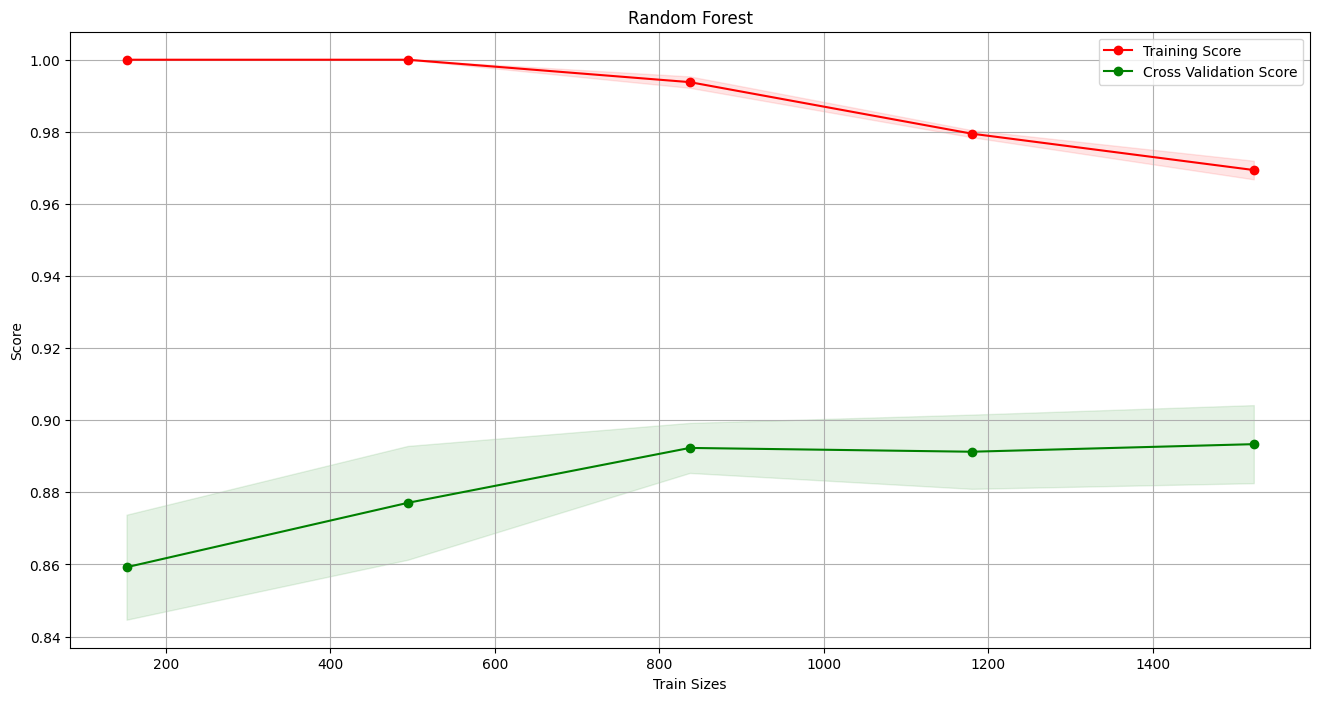

In [ ]:
plot_learning_curve(estimator=rf_clf1, X=X_train, y=y_train, title="Random Forest")

####Results

Training data accuracy: 95.48%
Testing data accuracy: 90.15%
ROC-AUC score test dataset:  94.6%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.93      0.93      0.93       327
     Churned       0.85      0.84      0.84       150

    accuracy                           0.90       477
   macro avg       0.89      0.88      0.89       477
weighted avg       0.90      0.90      0.90       477

----------------------------------------------------------------------

Confusion Matrix


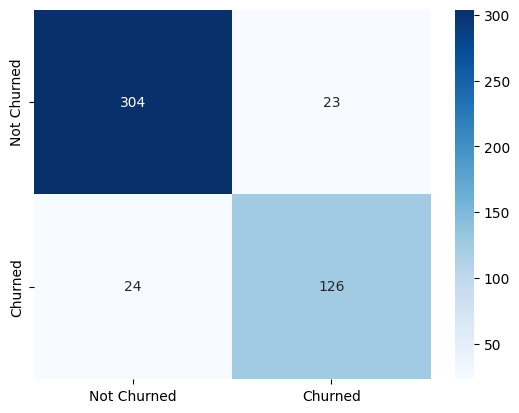

In [ ]:
y_pred = rf_clf1.predict(X_test)
probs = rf_clf1.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(rf_clf1.score(X_train, y_train)*100,2)}%')
print("Testing data accuracy:",f'{np.round(rf_clf1.score(X_test,y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()


cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

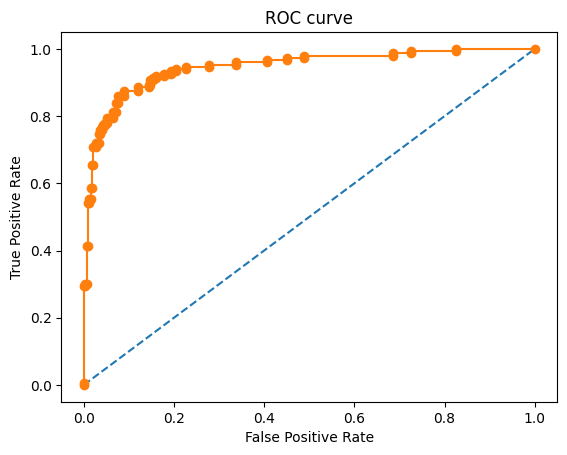

In [ ]:
plot_roc(y_test , probs)

In [ ]:
rf_clf_imp1 = rf_clf1.feature_importances_

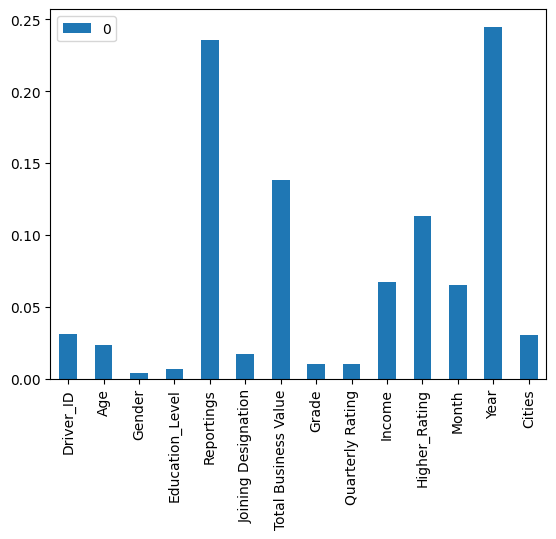

In [ ]:
pd.DataFrame(data=rf_clf_imp1, index=X.columns).plot(kind='bar')
plt.show()

###Gradient Boost Classifier

####Hyperparameter Tuning

In [ ]:
parameters = {"max_depth":[7,10,15], "n_estimators":[100,200,300,400], "max_features":[4,7,10], "ccp_alpha":[0.0005,0.00075,0.001]}
gbc = GBC()

grid_search = GridSearchCV(estimator = gbc, param_grid = parameters, scoring = "accuracy", refit=True, cv=3)
grid_search.fit(X_train,y_train.values.ravel())
grid_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.00075, max_depth=10, max_features=7)

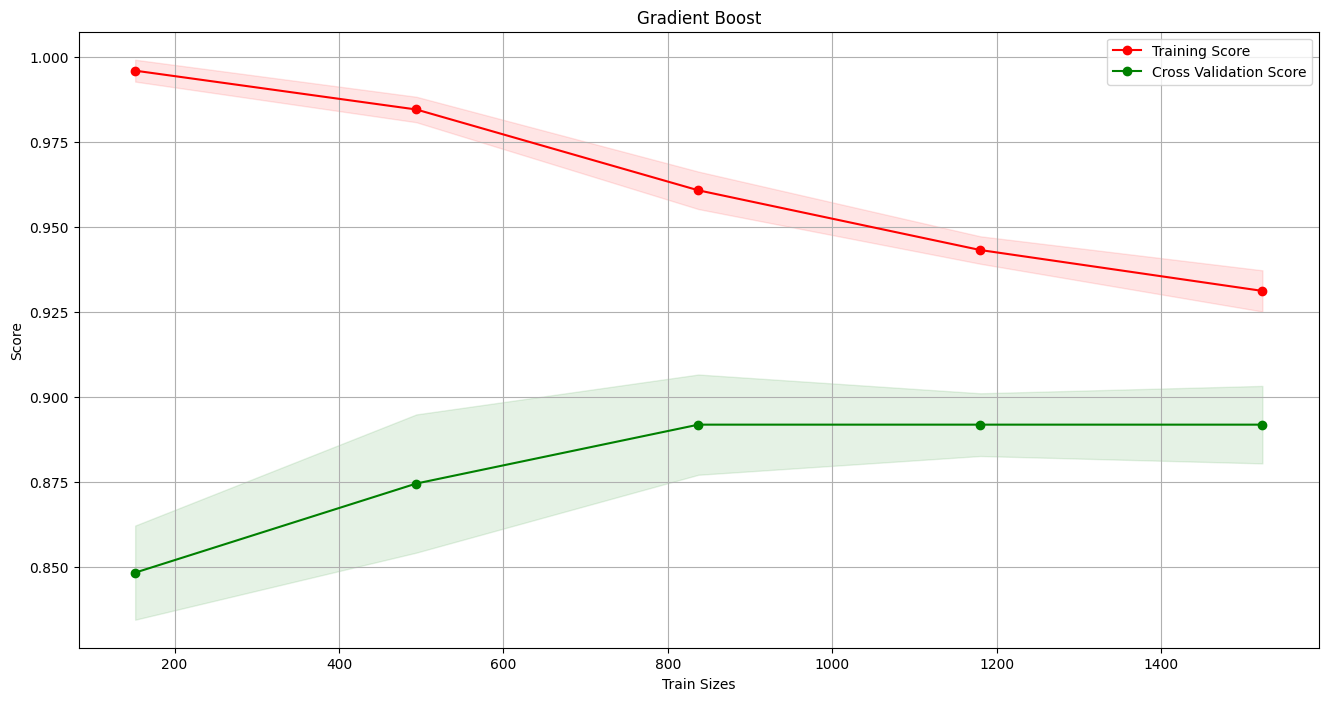

In [ ]:
gb_clf1 = GBC(ccp_alpha=0.00075, max_depth=10, max_features=7)
gb_clf1.fit(X_train, y_train)
plot_learning_curve(estimator=gb_clf1, X=X_train, y=y_train, title="Gradient Boost")

####Results

Training data accuracy: 92.33%
Testing data accuracy: 90.36%
ROC-AUC score test dataset:  94.91%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.92      0.94      0.93       327
     Churned       0.87      0.81      0.84       150

    accuracy                           0.90       477
   macro avg       0.89      0.88      0.89       477
weighted avg       0.90      0.90      0.90       477

----------------------------------------------------------------------

Confusion Matrix


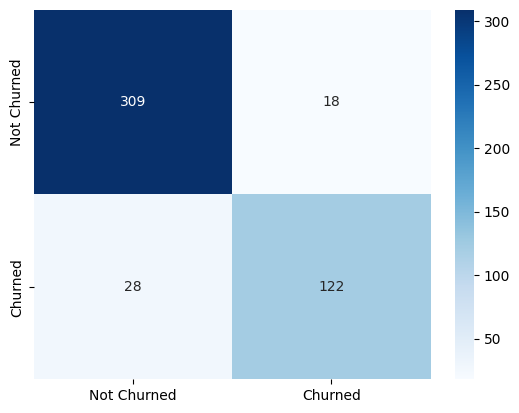

In [ ]:
y_pred = gb_clf1.predict(X_test)
probs = gb_clf1.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(gb_clf1.score(X_train, y_train)*100,2)}%')
print("Testing data accuracy:",f'{np.round(gb_clf1.score(X_test,y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()

cm2 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

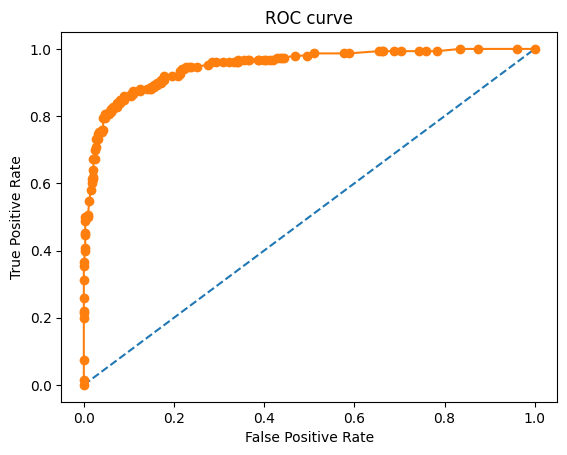

In [ ]:
plot_roc(y_test , probs)

In [ ]:
gb_clf_imp1 = gb_clf1.feature_importances_

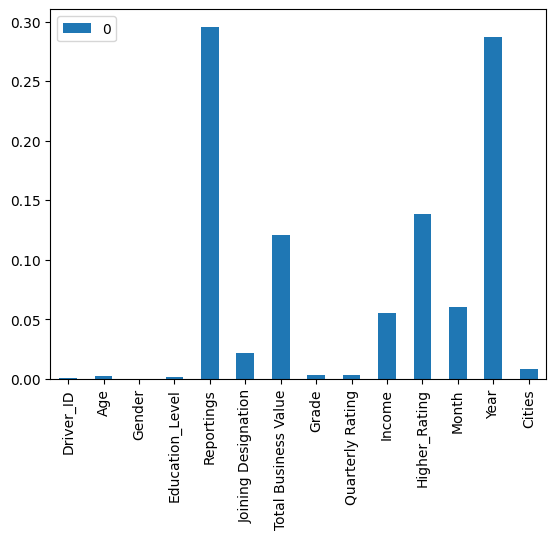

In [ ]:
pd.DataFrame(data=gb_clf_imp1, index=X.columns).plot(kind='bar')
plt.show()

###Bagging

In [ ]:
bc_clf1 = BC(base_estimator= DTC(max_depth=7,class_weight='balanced'), n_estimators=50,random_state=42)
bc_clf1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

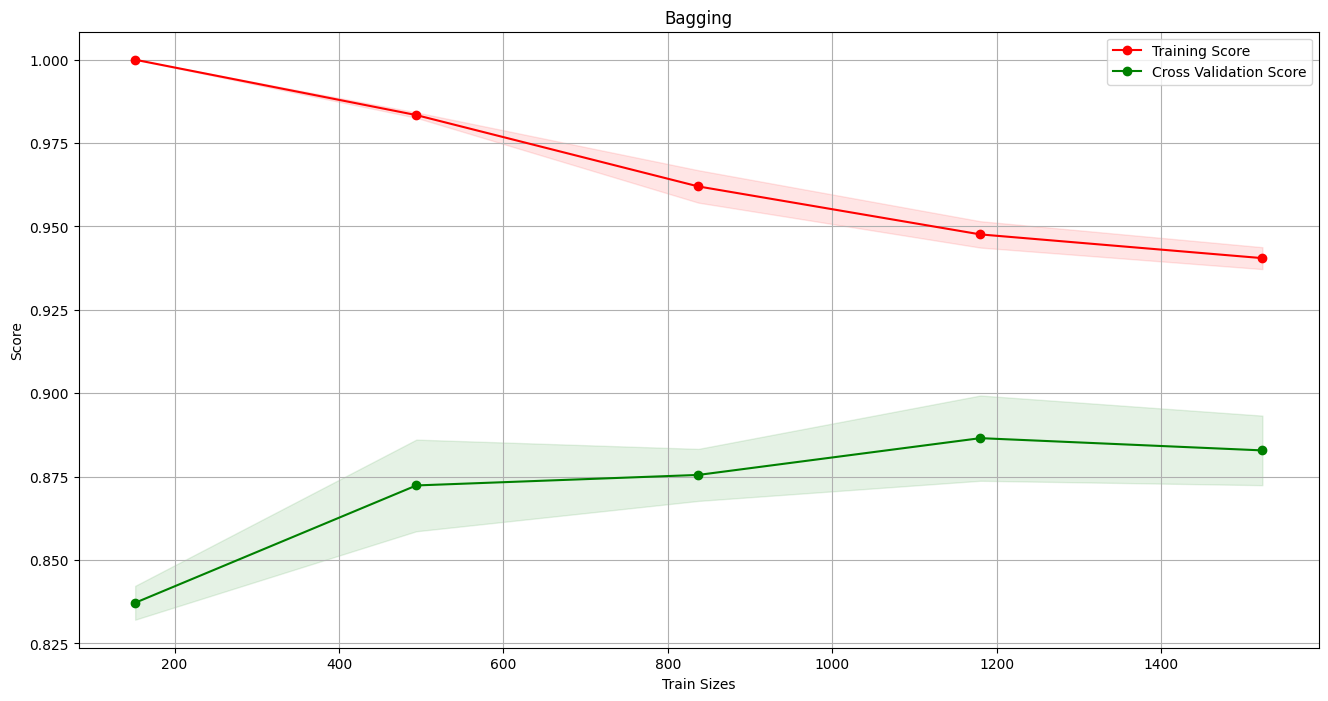

In [ ]:
plot_learning_curve(estimator=bc_clf1, X=X_train, y=y_train, title="Bagging")

####Results

Training data accuracy: 93.38%
Testing data accuracy: 89.1%
ROC-AUC score test dataset:  94.84%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.94      0.89      0.92       327
     Churned       0.79      0.89      0.84       150

    accuracy                           0.89       477
   macro avg       0.87      0.89      0.88       477
weighted avg       0.90      0.89      0.89       477

----------------------------------------------------------------------

Confusion Matrix


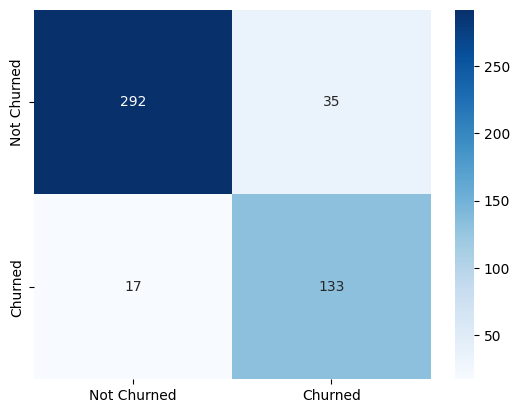

In [ ]:
y_pred = bc_clf1.predict(X_test)
probs = bc_clf1.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(bc_clf1.score(X_train, y_train)*100,2)}%')
print("Testing data accuracy:",f'{np.round(bc_clf1.score(X_test,y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()


cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

##Class Imbalance Treatment

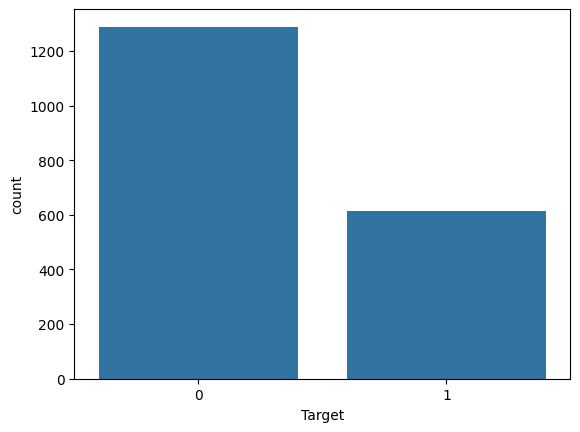

In [ ]:
sns.countplot(x=y_train)
plt.show()

In [ ]:
y_train.value_counts()

Target
0    1289
1     615
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train.ravel())

In [ ]:
from collections import Counter
Counter(y_train_smt)

Counter({1: 1289, 0: 1289})

###Random Forest Classifier

In [ ]:
rf_clf2 = RFC(ccp_alpha=0.001, max_depth=10, max_features=7, n_estimators=200)
rf_clf2.fit(X_train_smt, y_train_smt)

RandomForestClassifier(ccp_alpha=0.001, max_depth=10, max_features=7,
                       n_estimators=200)

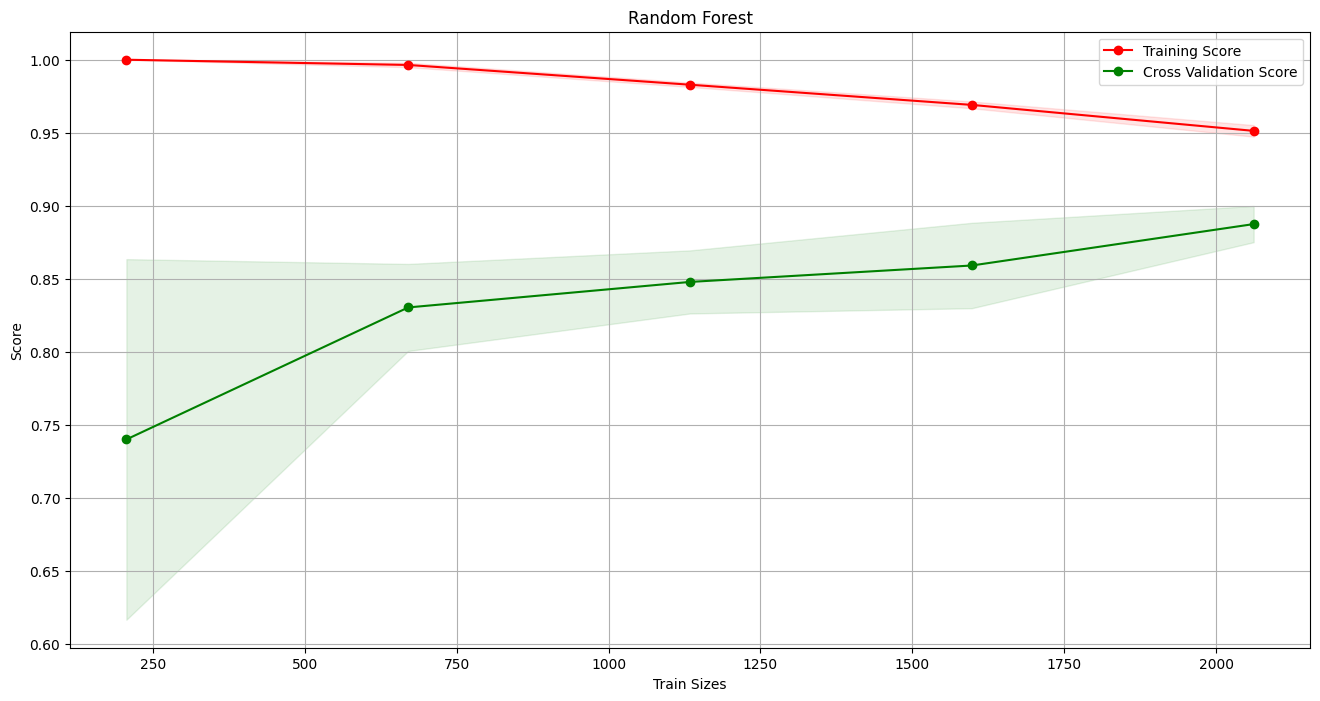

In [ ]:
plot_learning_curve(rf_clf2, X_train_smt, y_train_smt, "Random Forest")

####Results

Training data accuracy: 94.34%
Testing data accuracy: 87.21%
ROC-AUC score test dataset:  94.13%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.94      0.87      0.90       327
     Churned       0.75      0.89      0.81       150

    accuracy                           0.87       477
   macro avg       0.85      0.88      0.86       477
weighted avg       0.88      0.87      0.87       477

----------------------------------------------------------------------

Confusion Matrix


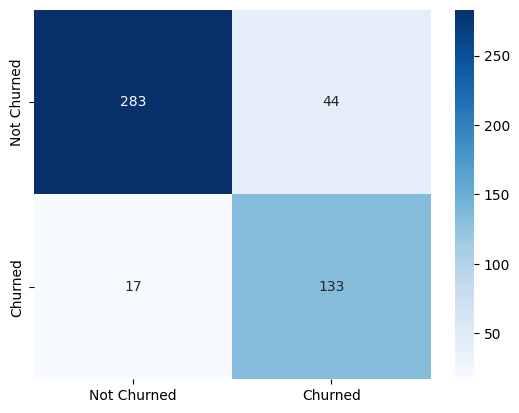

In [ ]:
y_pred = rf_clf2.predict(X_test)
probs = rf_clf2.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(rf_clf2.score(X_train_smt, y_train_smt)*100,2)}%')
print("Testing data accuracy:",f'{np.round(rf_clf2.score(X_test,y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()


cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

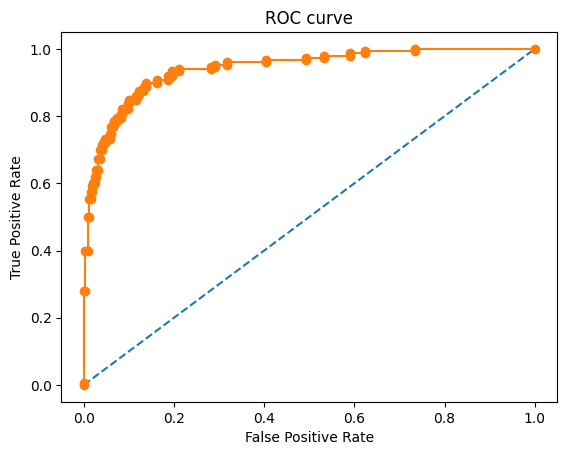

In [ ]:
plot_roc(y_test , probs)

In [ ]:
rf_clf_imp2= rf_clf2.feature_importances_

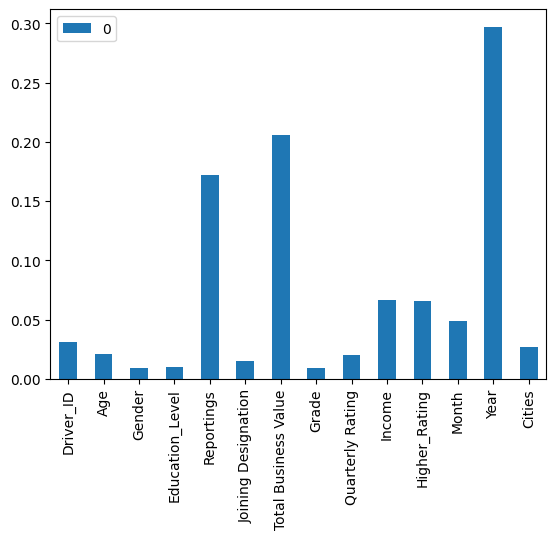

In [ ]:
pd.DataFrame(data=rf_clf_imp2, index=X.columns).plot(kind='bar')
plt.show()

###Gradient Boost Classifier

In [ ]:
gb_clf2 = GBC(ccp_alpha=0.00075, max_depth=10, max_features=7)
gb_clf2.fit(X_train_smt, y_train_smt)

GradientBoostingClassifier(ccp_alpha=0.00075, max_depth=10, max_features=7)

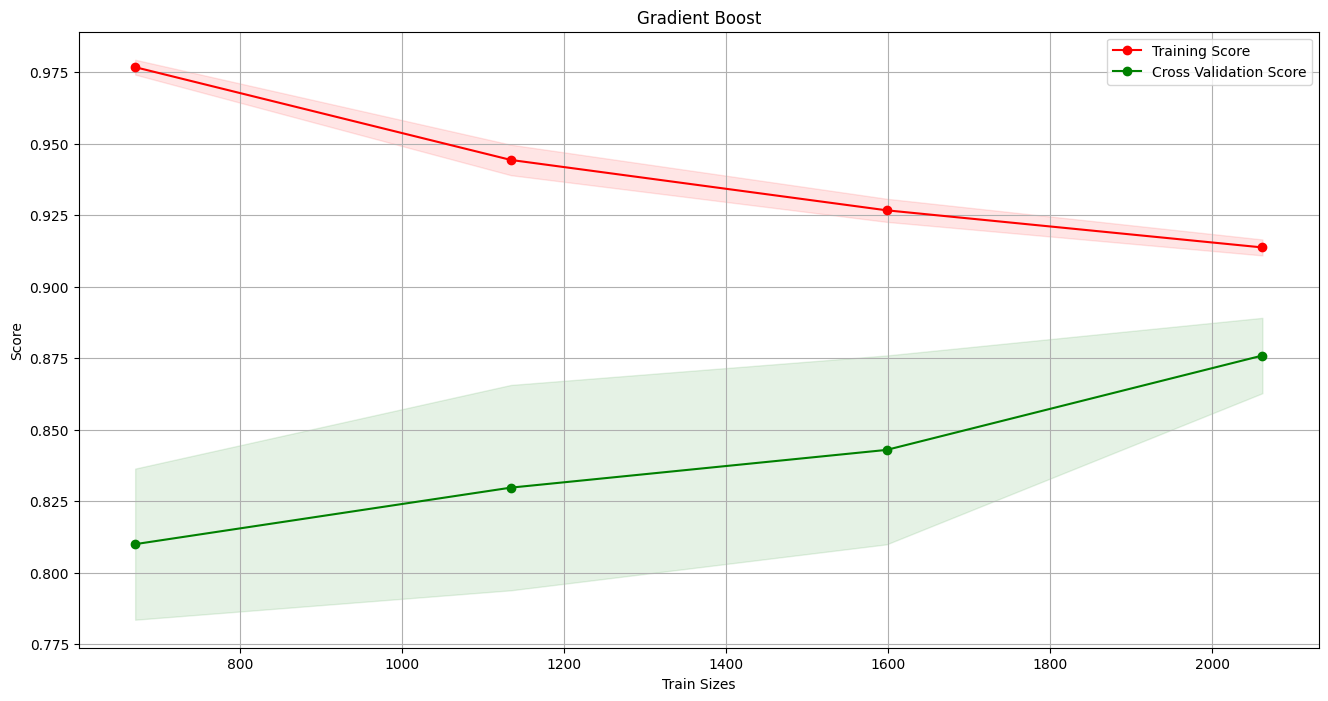

In [ ]:
plot_learning_curve(gb_clf2, X_train_smt, y_train_smt, "Gradient Boost")

####Results

Training data accuracy: 90.96%
Testing data accuracy: 87.42%
ROC-AUC score test dataset:  94.13%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.95      0.86      0.90       327
     Churned       0.75      0.90      0.82       150

    accuracy                           0.87       477
   macro avg       0.85      0.88      0.86       477
weighted avg       0.89      0.87      0.88       477

----------------------------------------------------------------------

Confusion Matrix


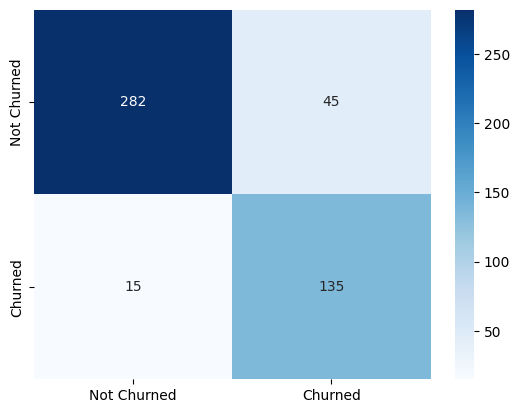

In [ ]:
y_pred = gb_clf2.predict(X_test)
probs = gb_clf2.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(gb_clf2.score(X_train_smt, y_train_smt)*100,2)}%')
print("Testing data accuracy:",f'{np.round(gb_clf2.score(X_test, y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()


cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

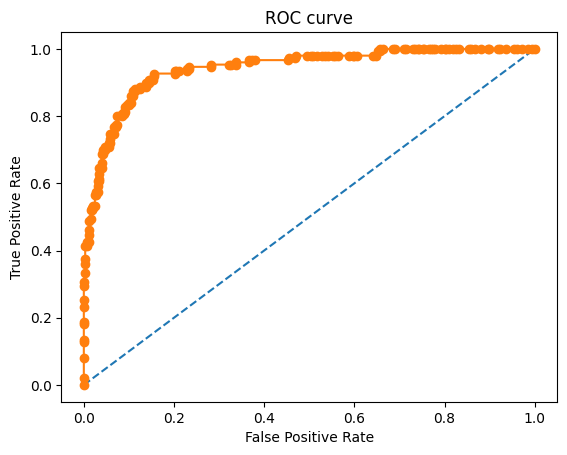

In [ ]:
plot_roc(y_test , probs)

In [ ]:
gb_clf_imp2= gb_clf2.feature_importances_

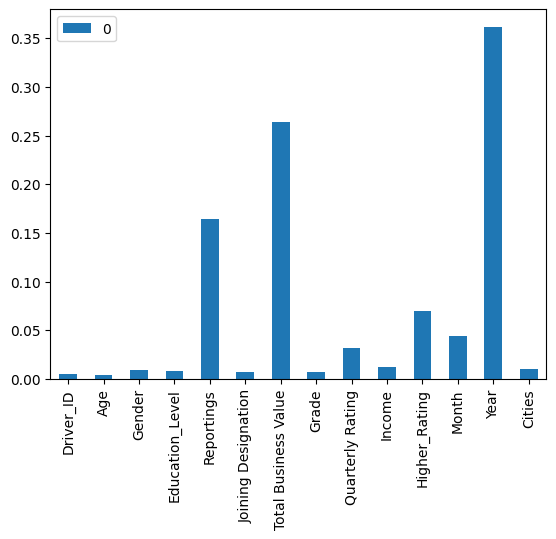

In [ ]:
pd.DataFrame(data=gb_clf_imp2, index=X.columns).plot(kind='bar')
plt.show()

###Bagging

In [ ]:
bc_clf2 = BC(base_estimator= DTC(max_depth=7,class_weight='balanced'), n_estimators=50,random_state=42)
bc_clf2.fit(X_train_smt,y_train_smt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50, random_state=42)

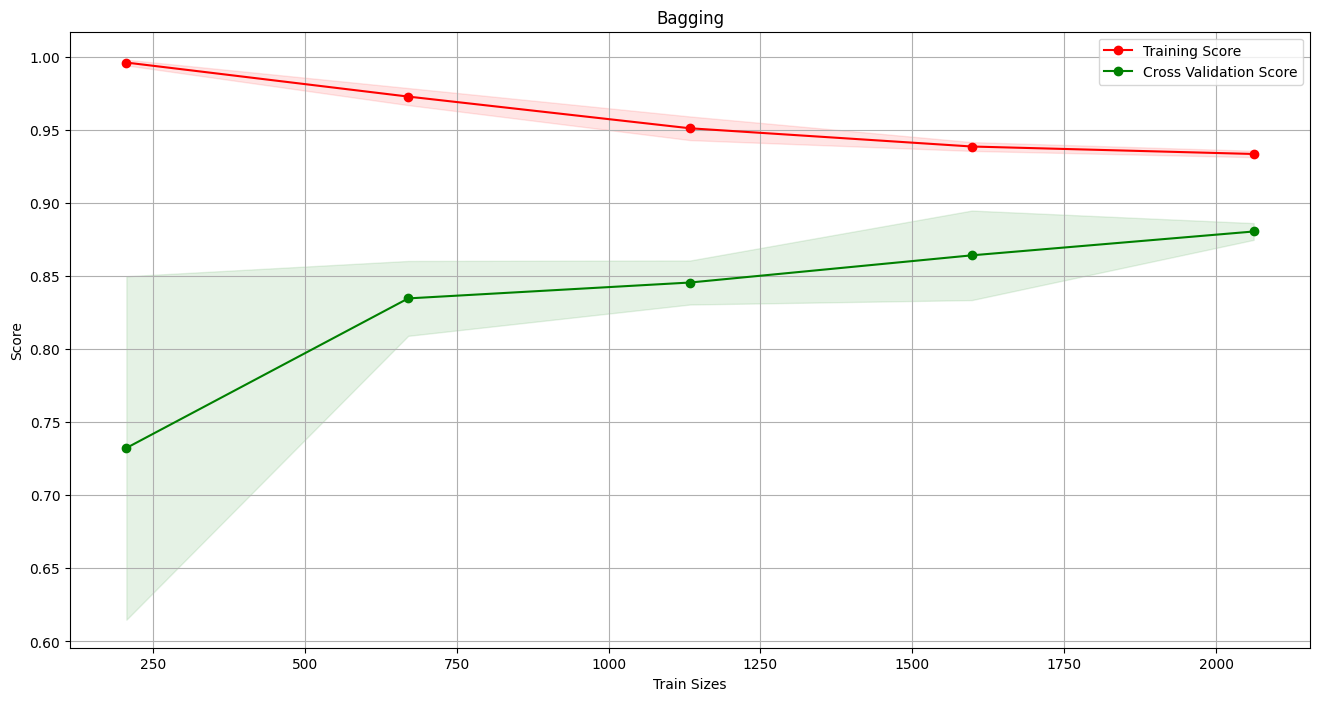

In [ ]:
plot_learning_curve(estimator=bc_clf2, X=X_train_smt, y=y_train_smt, title="Bagging")

####Results

Training data accuracy: 91.81%
Testing data accuracy: 86.79%
ROC-AUC score test dataset:  93.56%

----------------------------------------------------------------------
              precision    recall  f1-score   support

 Not Churned       0.94      0.86      0.90       327
     Churned       0.75      0.88      0.81       150

    accuracy                           0.87       477
   macro avg       0.84      0.87      0.85       477
weighted avg       0.88      0.87      0.87       477

----------------------------------------------------------------------

Confusion Matrix


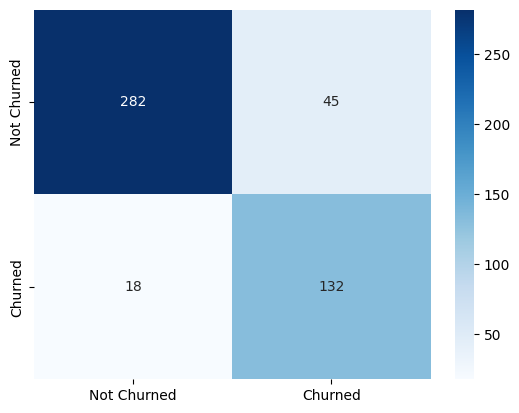

In [ ]:
y_pred = bc_clf2.predict(X_test)
probs = bc_clf2.predict_proba(X_test)[:,1]

print("Training data accuracy:",f'{np.round(bc_clf2.score(X_train, y_train)*100,2)}%')
print("Testing data accuracy:",f'{np.round(bc_clf2.score(X_test,y_test)*100,2)}%')
print("ROC-AUC score test dataset: ", f'{np.round(roc_auc_score(y_test, probs)*100,2)}%')

print()
print('-'*70)
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))
print('-'*70)
print()


cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Matrix')
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='.4g', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.show()

#Insights And Recommendations
---

In [ ]:
pd.DataFrame({'Model':['Random Forest', 'Random Forest', 'Gradient Boost', 'Gradient Boost', 'Bagging', 'Bagging'],
              'Class':['Unbalanced', 'Balanced', 'Unbalanced', 'Balanced', 'Unbalanced', 'Balanced'],
              'Testing Accuracy %':[90.15, 87.21, 90.36, 87.42, 89.1, 86.79]})

,Model,Class,Testing Accuracy %
0,Random Forest,Unbalanced,90.15
1,Random Forest,Balanced,87.21
2,Gradient Boost,Unbalanced,90.36
3,Gradient Boost,Balanced,87.42
4,Bagging,Unbalanced,89.10
5,Bagging,Balanced,86.79



---

<font size='5'> Insights:

* So we see that there are 57% male employees and 43% female employees.

* The percentages of employees with different education levels are almost same for level 1 & 2.

* Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.

* Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.

* About 55% of the reportings of the employees has got Quarterly Rating 1.

* Top 3 most important features are: 'Year', 'Reportings', and 'Total Business Value'.

---

<font size='5'> Recommendations:

* Employees have to be given a raise/bonus on timely basis.

* Proper Training of the drivers is required to improve their Quraterly Rating.

* While capturing data, we need to focus on 'Year', 'Reportings', and 'Total Business Value' to maintain/improve model's accuracy.
